In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("/kaggle/input/red-and-white-wine-quality-merged/wine_quality_merged.csv")
df = pd.DataFrame(data)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


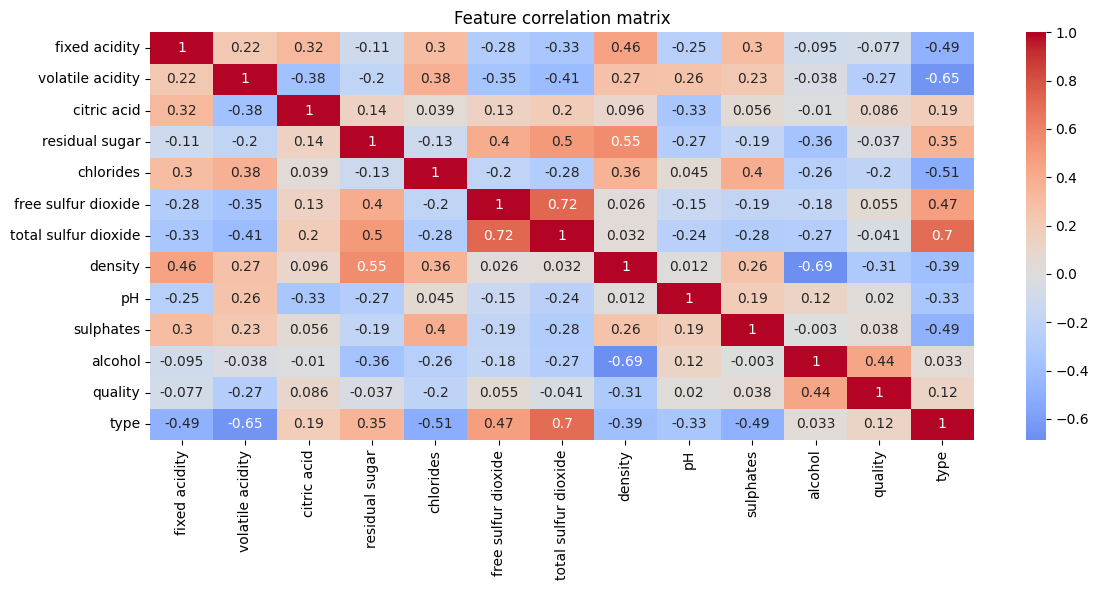

In [6]:
correlation_matrix = df.corr()

plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix,
            annot = True,
            fmt = ".2g",
            center = 0,
            cmap = 'coolwarm')
plt.title("Feature correlation matrix")
plt.tight_layout()
plt.show()

In [7]:
X = df.drop(['type'], axis=1)
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

Training accuracy Logistic Regression :  0.9953819511256494
Testing accuracy Logistic Regression :  0.9930769230769231

Classification report 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       341
           1       0.99      1.00      1.00       959

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300



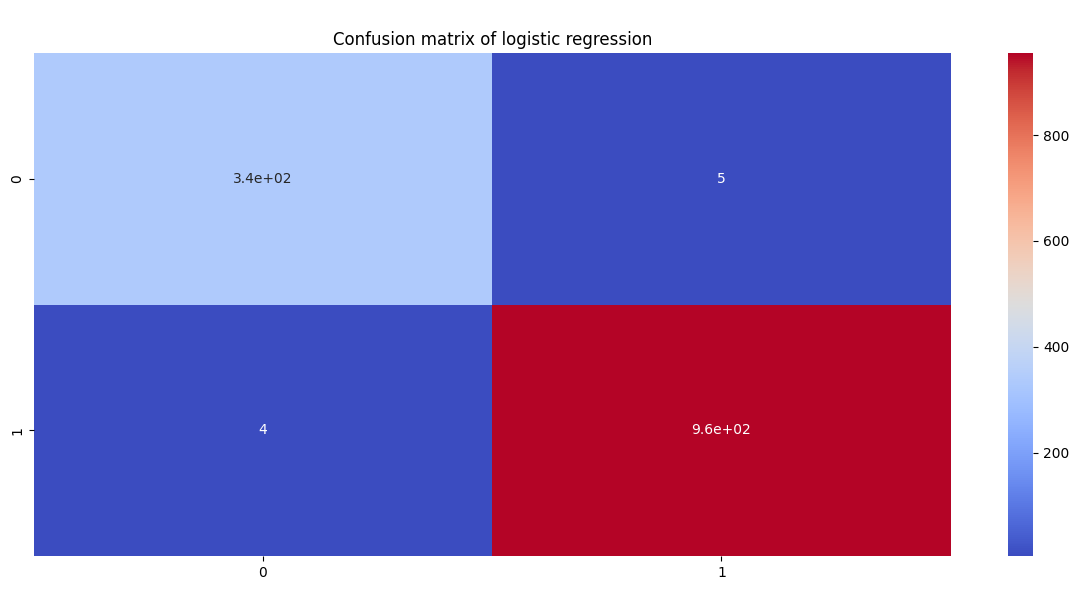

In [8]:
logistic = LogisticRegression(
    class_weight = 'balanced',
    C = 10,
    penalty = 'l1',
    solver = 'liblinear'
)
logistic.fit(X_train_sc, y_train)

train_preds = logistic.predict(X_train_sc)
acc = accuracy_score(y_train, train_preds)
print("Training accuracy Logistic Regression : ", acc)

test_preds = logistic.predict(X_test_sc)
acc_test = accuracy_score(y_test, test_preds)
print("Testing accuracy Logistic Regression : ", acc_test)

print("\nClassification report \n", classification_report(y_test, test_preds))
#print("Confusion matrix \n", confusion_matrix(y_test, test_preds))

vis = confusion_matrix(y_test, test_preds)

plt.figure(figsize=(12,6))
sns.heatmap(
    vis,
    annot = True,
    cmap = 'coolwarm'
)
plt.title("\nConfusion matrix of logistic regression")
plt.tight_layout()
plt.show()

In [9]:
params = {
    "C" : [0.01, 0.1, 1, 10],
    "penalty" : ['l1', 'l2'],
    "solver" : ['liblinear', 'saga']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), params, cv=5)
grid.fit(X,y)

print("Best parameters : ", grid.best_params_)
print("Best score : ", grid.best_score_)

Best parameters :  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best score :  0.9878410611713152


In [10]:
knn = KNeighborsClassifier(
    algorithm = 'auto',
    metric = 'manhattan',
    n_neighbors = 11,
    weights = 'distance'
)
knn.fit(X_train_sc, y_train)

train_preds = knn.predict(X_train_sc)
acc = accuracy_score(y_train, train_preds)
print("Training accuracy KNN : ", acc)

test_preds = knn.predict(X_test_sc)
acc = accuracy_score(y_test, test_preds)
print("Testing accuracy KNN : ", acc)

Training accuracy KNN :  0.9996151625938041
Testing accuracy KNN :  0.9938461538461538


In [11]:
knnparams = {
    "n_neighbors" : [5, 7, 11, 15, 21],
    "metric" : ['euclidean', 'manhattan', 'minkowski'],
    "weights" : ['uniform', 'distance'],
    "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid = GridSearchCV(KNeighborsClassifier(), knnparams, cv=5)
grid.fit(X,y)

print("Best parameters : ", grid.best_params_)
print("Best score : ", grid.best_score_)

Best parameters :  {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Best score :  0.9485940664416417


In [12]:
hgbm = HistGradientBoostingClassifier()
hgbm.fit(X_train, y_train)

train_preds = hgbm.predict(X_train)
acc = accuracy_score(y_train, train_preds)
print("Training accuracy Hist Gradient : ", acc)

train_preds = hgbm.predict(X_test)
acc = accuracy_score(y_test, train_preds)
print("Testing accuracy Hist Gradient : ", acc)

Training accuracy Hist Gradient :  0.9996151625938041
Testing accuracy Hist Gradient :  0.9961538461538462
